In [3]:
file_path = "/content/dane1.csv"

In [4]:
import pandas as pd
MAIN_DATA = pd.read_csv(file_path)

In [5]:
info = MAIN_DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5103 entries, 0 to 5102
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   coordinates                 16 non-null     object 
 1   created_at                  5103 non-null   object 
 2   hashtags                    1578 non-null   object 
 3   media                       801 non-null    object 
 4   urls                        1158 non-null   object 
 5   favorite_count              5103 non-null   int64  
 6   id                          5103 non-null   int64  
 7   in_reply_to_screen_name     1149 non-null   object 
 8   in_reply_to_status_id       1133 non-null   float64
 9   in_reply_to_user_id         1149 non-null   float64
 10  lang                        5103 non-null   object 
 11  place                       69 non-null     object 
 12  possibly_sensitive          1727 non-null   object 
 13  quote_id                    224 n

In [6]:
df = MAIN_DATA.copy()

In [7]:
!python -m spacy download pl_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 75.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pl_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [8]:
import pandas as pd
import spacy

nlp = spacy.load("pl_core_news_sm")
data1 = "/content/dane1.csv"
nlp.max_length = 4000000

with open (data1, "r", encoding = "utf-8") as file:
  text_data1= file.read()
  doc_data1 = nlp(text_data1)

In [ ]:
# Replace abbreviated weekday names with english equivalents (full weekday names) - created_at column


In [9]:
df["created_at"] = df['created_at'] = (
    df['created_at']
    .str.replace('Mon', 'Monday')
    .str.replace('Tue', 'Tuesday')
    .str.replace('Wed', 'Wednesday')
    .str.replace('Thu', 'Thursday')
    .str.replace('Fri', 'Friday')
    .str.replace('Sat', 'Saturday')
    .str.replace('Sun', 'Sunday')
)

In [10]:
print(df['created_at'])

0       Tuesday Jun 01 05:26:49 +0000 2021
1       Tuesday Jun 01 04:15:56 +0000 2021
2       Tuesday Jun 01 04:47:19 +0000 2021
3       Tuesday Jun 01 05:47:47 +0000 2021
4       Tuesday Jun 01 05:03:08 +0000 2021
                       ...                
5098     Friday Jun 04 15:44:32 +0000 2021
5099     Friday Jun 04 15:39:10 +0000 2021
5100     Friday Jun 04 15:41:51 +0000 2021
5101     Friday Jun 04 15:42:02 +0000 2021
5102     Friday Jun 04 15:43:33 +0000 2021
Name: created_at, Length: 5103, dtype: object


In [ ]:
# Replace abbreviated month names with numerical equivalents (e.g. Jun to 06) - user_created_at column

In [11]:
df["user_created_at"].head()

,user_created_at
0,Thu Oct 13 11:53:32 +0000 2016
1,Sun May 07 09:55:46 +0000 2017
2,Wed Aug 28 13:39:39 +0000 2013
3,Mon Mar 20 19:25:17 +0000 2017
4,Tue Feb 22 10:12:07 +0000 2011


In [12]:
months = [("Jan", "01"), ("Feb", "02"), ("Mar", "03"), ("Apr", "04"),
          ("May", "05"), ("Jun", "06"), ("Jul", "07"), ("Aug", "08"),
          ("Sep", "09"), ("Oct", "10"), ("Nov", "11"), ("Dec", "12")]

for old, new in months:
    df["user_created_at"] = df["user_created_at"].str.replace(old, new)


In [13]:
df["user_created_at"].head()

,user_created_at
0,Thu 10 13 11:53:32 +0000 2016
1,Sun 05 07 09:55:46 +0000 2017
2,Wed 08 28 13:39:39 +0000 2013
3,Mon 03 20 19:25:17 +0000 2017
4,Tue 02 22 10:12:07 +0000 2011


In [ ]:
# Get all links to tweets and pass them to the list

In [14]:
tweet_links = [df["tweet_url"].dropna().tolist()]

In [15]:
tweet_links

[['https://twitter.com/MarkonMarek/status/1399598285082476544',
  'https://twitter.com/21lupus/status/1399580447902994435',
  'https://twitter.com/WTP_Warszawa/status/1399588347358633987',
  'https://twitter.com/m3_ememem/status/1399603562343194625',
  'https://twitter.com/j_wisniewska/status/1399592325324619780',
  'https://twitter.com/Likaifen/status/1399580232156291072',
  'https://twitter.com/serhenryk/status/1399594808545480705',
  'https://twitter.com/bankiet_owa/status/1399593858334347264',
  'https://twitter.com/Warszawa_STAT/status/1399610269467394048',
  'https://twitter.com/twojababkaa/status/1399574621830193157',
  'https://twitter.com/KonradZiembicki/status/1399601711308754944',
  'https://twitter.com/p_danielewski/status/1399591707747000321',
  'https://twitter.com/Aettka/status/1399609540849639426',
  'https://twitter.com/pogodawawa/status/1399591690172784640',
  'https://twitter.com/PawelLech1/status/1399532000218865666',
  'https://twitter.com/TymMarc/status/1399611322

In [16]:
# Get all links found in tweets and pass them to the list (urls column)
inside_tweet_links = df["urls"].dropna().tolist()

In [17]:
inside_tweet_links

['https://ift.tt/3yTNxU8',
 'http://m.in',
 'https://bit.ly/3vFbjBr',
 'https://warszawa.wyborcza.pl/warszawa/7,54420,27148510,92-letni-powstaniec-zbieral-na-operacje-oczu-zostal-okradziony.html',
 'https://ift.tt/2eGZx0Z',
 'https://www.facebook.com/skkpolonia/videos/378163756953482',
 'https://ift.tt/3uD9dki',
 'http://drogi.gddkia.gov.pl',
 'http://dlvr.it/S0q2fc',
 'https://warszawa.wyborcza.pl/warszawa/7,54420,27157444,warszawskie-puby-przygotowuja-sie-na-euro-2020-na-przeszkodzie.html',
 'https://tvn24.pl/tvnwarszawa/srodmiescie/warszawa-policja-pozyczali-markowe-odkurzacze-i-sprzedawali-w-internecie-za-pol-ceny-5109381',
 'https://warszawa.wyborcza.pl/warszawa/7,54420,27097011,ty-cwana-suko-twoja-sielanka-w-koncu-sie-skonczy-od-ponad.html',
 'https://www.gddkia.gov.pl/pl/a/41338/Konkurs-Innowacje-w-drogownictwie',
 'https://twitter.com/LukaszKohut/status/1399474538082144263',
 'https://warszawa.wyborcza.pl/warszawa/7,54420,27149691,najdluzszy-tunel-w-polsce-poza-zasiegiem-telefo

In [ ]:
# Get all image links and pass them to the list (media column)

In [18]:
df["media"].head (30)

,media
0,https://twitter.com/MarkonMarek/status/1399598...
1,NaN
2,NaN
3,NaN
4,https://twitter.com/j_wisniewska/status/139959...
5,NaN
6,https://twitter.com/serhenryk/status/139959480...
7,NaN
8,https://twitter.com/Warszawa_STAT/status/13996...
9,NaN


In [19]:
image_links = df['media'].dropna().tolist()

In [20]:
image_links

['https://twitter.com/MarkonMarek/status/1399598285082476544/photo/1',
 'https://twitter.com/j_wisniewska/status/1399592325324619780/photo/1',
 'https://twitter.com/serhenryk/status/1399594808545480705/photo/1',
 'https://twitter.com/Warszawa_STAT/status/1399610269467394048/photo/1',
 'https://twitter.com/MarkonMarek/status/1399598174130552833/photo/1',
 'https://twitter.com/OnetWiadomosci/status/1399587525220466689/photo/1',
 'https://twitter.com/Glodowo/status/1399606791114219521/photo/1',
 'https://twitter.com/DGWdowodztwo/status/1399593660421865475/photo/1',
 'https://twitter.com/AutoMapa/status/1399607162167513089/photo/1',
 'https://twitter.com/AutoMapa/status/1399592059435196416/photo/1',
 'https://twitter.com/bartjakubik/status/1399580935901827079/photo/1',
 'https://twitter.com/obpowsin/status/1399573466458775555/photo/1',
 'https://twitter.com/MuzeumSportu/status/1399588686614892549/photo/1',
 'https://twitter.com/WTP_Warszawa/status/1399611686429003779/video/1',
 'https://tw

In [ ]:
# Remove all words marked as stopwords and pass the cleaned text to a new column called text_without_stopwords.

In [21]:
df["text"].head(40)

,text
0,@beata_skwarska Warszawa 😀 https://t.co/W7BcyS...
1,Nieznani sprawcy podpalili kapliczkę nadrzewną...
2,⚠️ Utrudnienia w komunikacji: L20 https://t.co...
3,@LukaszKohut @moanrosa @LincaAgata @jan_jozef_...
4,"Dzieci to największy skarb, o który musimy dba..."
5,Zbliża się 81 rocznica I Transportu do KL Ausc...
6,1 czerwca 1895 urodził się Tadeusz Komorowski ...
7,@BIPolska alez to brzydkie😐. Nijakie. Warszawa...
8,"Pomimo malejącej liczby urodzeń w Warszawie, l..."
9,@arayoff warszawa


In [39]:
for text in df["text"]:
    doc = nlp(text)
    for token in doc:
        print(token.text, token.is_stop)

Streaming output truncated to the last 5000 lines.
. False
30 False
- False
18 False
) False

 False
- False
przy True
kinie False
Silver False
Screen False
, False
ul False
. False
Puławska False
( False
17 False
- False
18 False
) False

 False
- False
przy True
K&amp;M False
os False
. False
Zielona False
w True
Wesołej False
, False
przy True
K&amp;M False
w True
St False
. False
Miłosnej False
i True
na True
Białołęce False
skrzyżowanie False
Ćmielowskiej False
i True
Światowida False
( False
17 False
- False
19 False
) False
https://t.co/Wp9mKaMc2 False
T False
@trzaskowski False
_ False
@warszawa False
@M_K_Blonska False
@EDGrupinska False
Mi True
# False
4czerwca False
kojarzy False
się True
tylko True
z True
https://t.co/zWAjSB0CHS False
# False
4czerwca False
, False
w True
rocznicę False
pierwszych False
częściowo False
wolnych False
wyborów False
1989 False
r False
. False
, False
w True
święto False
@warszawa False
odsłoniliśmy False
pomnik False
„ False
Solidarności False

In [44]:
df['text_without_stopwords'] = ""
df['text_without_stopwords'] = ""
def no_stopwords(text):
    doc = nlp(text)
    return [token.text for token in doc if not token.is_stop]

df["text_without_stopwords"] = df["text"].apply(no_stopwords)
print(df["text_without_stopwords"].head(3))

0    [@beata_skwarska, Warszawa, 😀, https://t.co/W7...
1    [Nieznani, sprawcy, podpalili, kapliczkę, nadr...
2    [⚠, ️, Utrudnienia, komunikacji, :, L20, https...
Name: text_without_stopwords, dtype: object


In [ ]:
# List the top 5 tweets with the highest number of likes

In [22]:
top_likes = df.sort_values(by="favorite_count", ascending=False).head(5)

for tweet in top_likes["text"]:
    print(tweet)

Dziś z prezydent-elekt @Tsihanouskaya mówiliśmy o pomocy dla Białorusi. Jako samorządowcy pomagamy jak możemy – przekazujemy informacje, wspieramy organizacje białoruskie. Pomagamy też Białorusinom, których w @warszawa jest najwiecej, np. przyznając mieszkania. https://t.co/3lUibemkLj
Warszawa czeka na @Tsihanouskaya. #StandWithBelarus https://t.co/NSCx89TdY7
Jasio, który nie panuje nad swoją jadaczką, znowu przegrał proces. 
Młody jest. Ciekawe ile się tego nazbiera przez kolejne lata? 
https://t.co/cc0AQFHY1z
Czyli prezydenci opozycji: 
👉Poznań -cieszy się z okresu okupacji Polski  
👉Warszawa -wprost finansowany z niemieckich fundacji, po co lotnisko w Polsce jak jest w Berlinie 
👉Gdańsk -II wojna zaczęła się od „złego słowa Polaków” 
Analfabeci historyczni i lojalność zewnętrzna https://t.co/pJor6dt2Tn
Pierwszy z 21 nowych pociągów @SKM_Warszawa już w docelowych barwach!🙂 Kolejny etap to montaż wyposażenia oraz dodatkowych elementów, jak Wi-Fi, ładowarki USB, automaty biletowe czy r

In [23]:
top_likes['favorite_count']

,favorite_count
4599,1386
4012,744
290,623
1466,605
1841,553


In [ ]:
# List the top 5 tweets with the highest number of retweets

In [ ]:
# retweet_count descending, then print 5 tweets

In [24]:
top_retweet = df.sort_values(by="retweet_count", ascending=False).head(5)

for tweet in top_retweet["text"]:
    print(tweet)

HALO WARSZAWA
chętnie rozjaśnię, ufarbuję, zetnę Wam włosy tanio i dobrze
przez obecną sytuację notorycznie upierdalają mi godziny w robocie, a pod koniec roku będę miał robiony prywatnie ważny i kosztowny zabieg, i potrzebuję dorobić na boku

proszę chociaż o RT https://t.co/AqlxWzn9u0
‼️
A teraz perełka. Finał Was rozwali. 
10-10-2019 Warszawa
Leszek jest niepełnosprawny. Znalazł się w parku w pobliżu pl. Piłsudskiego gdzie akurat odbywały się jasełka smoleńskie. Leszek został zatrzymany przez 5 policjantów. https://t.co/ELmX7gsRAW
UWAGA #Warszawa Śniadeckich 12/16

Pani Danuta i Pan Stanisław od 25 lat prowadzą sklep ,,Domal”. Z biegiem lat ludzie zaczęli o nim zapominać. Przez covid dochody znacząco spadły. Pani Danuta chętnie każdemu doradzi. Koniecznie odwiedźcie sklep! https://t.co/RROID305u2
UWAGA #Warszawa Śniadeckich 12/16

Pani Danuta i Pan Stanisław od 25 lat prowadzą sklep ,,Domal”. Z biegiem lat ludzie zaczęli o nim zapominać. Przez covid dochody znacząco spadły. Pani Dan

In [25]:
top_retweet['retweet_count']

,retweet_count
622,1638
4383,896
1190,865
3904,865
182,865


In [ ]:
# Show only tweets that are not considered 'sensitive' (possibly_sensitive column).

In [26]:
df["possibly_sensitive"].value_counts()

,count
possibly_sensitive,
False,1702
True,25


In [27]:
not_sensitive = df[df["possibly_sensitive"] == False]

for elem in not_sensitive["text"]:
    print(elem)


@beata_skwarska Warszawa 😀 https://t.co/W7BcySyuNd
⚠️ Utrudnienia w komunikacji: L20 https://t.co/DXAKboKzf5
Dzieci to największy skarb, o który musimy dbać 👨‍👩‍👧‍👦🐻🍭🍬🍦 #WspieramyRodziny 
Dużo radości nie tylko z okazji #DzieńDziecka 🙂 Warszawa 2011, na zdjęciu https://t.co/S1IoJuhtiL. Franio - dziś ma 10 lat 🙂 https://t.co/1YYQPTz1le
1 czerwca 1895 urodził się Tadeusz Komorowski - żołnierz i polityk, generał dywizji, Naczelny Wódz Polskich Sił Zbrojnych, Komendant Główny Armii Krajowej, premier rządu RP na uchodźstwie. 

,,Gdybyśmy zachowali się zupełnie biernie, Warszawa nie uniknęłaby zniszczeń i strat.'' https://t.co/HaTE06Qn9b
Pomimo malejącej liczby urodzeń w Warszawie, liczba #dzieci wzrasta. Wszystko za sprawą migracji do atrakcyjnej dla rodzin z dziećmi stolicy. https://t.co/NaRixsWTpo
 
Z okazji #DzieńDziecka najmłodszym mieszkańcom #Warszawa i #Mazowsze życzymy samych radości i spełnienia marzeń! https://t.co/JoLh9B5cbe
Ludzie są okrutni.
https://t.co/GgNSNbPAfA
Pogoda dziś 

In [ ]:
# Show the tweets of the user who created the account earliest
# (of all users in the dataset) (user_created_at column).

In [28]:
earliest_user = df.sort_values(by="user_created_at", ascending=True).head(1)
earliest_user_id = earliest_user["user_name"].iloc[0]
tweets_earliest_user = df[df["user_name"] == earliest_user_id]

for tweet in tweets_earliest_user["text"]:
    print(tweet)

@JakubFlower @AM_Zukowska @K_Galecka @ZDM_Warszawa Trzeba będzie stopa łapać, żeby podjechać do przejścia


In [ ]:
# Show the tweets of the user with the most followers.

In [29]:
favourite_user = df.sort_values(by="user_followers_count", ascending=True).head(1)
favourite_user_id = favourite_user["user_name"].iloc[0]
tweets_favourite_user = df[df["user_name"] == favourite_user_id]

for tweet in tweets_favourite_user["text"]:
    print(tweet)

Urodziłeś/-aś się w latach 2004-09 i mieszkasz na #Mazowsze? 🧐 Mamy dla Ciebie wyzwanie: opowiedz nam o swojej gminie lub mieście za pomocą statystycznej infografiki.📊 Czekają atrakcyjne nagrody!🏆 Szczegóły konkursu: https://t.co/O1HYKKrgek

#NSP2021 #LiczySięKażdy #Warszawa https://t.co/NioWi0JXNp
Największe województwo, największe wyzwania, ale też z pewnością największa satysfakcja z pracy! Z okazji #DzieńSamorząduTerytorialnego życzymy wszystkim Przedstawicielom i Pracownikom samorządu terytorialnego #Mazowsze sukcesów i zawodowego spełnienia! ➡️https://t.co/HxUZVaCcMm https://t.co/JoBTco9v9Z
To nie akwizytor ani natrętny telemarketer z call center. Rachmistrz spisowy #NSP2021 dzwoni, aby Ci pomóc. Skorzystaj z okazji, żeby się spisać i poczuć satysfakcję z dobrze spełnionego obowiązku!💪 ➡️https://t.co/IdulsSHbHw 

#Mazowsze #Warszawa #LiczySięKażdy https://t.co/G7nx4MKGZ9
W 2019 r. wśród świeżo upieczonych Mam z woj. mazowieckiego najwięcej było „debiutantek”. Ale były też Panie b

In [ ]:
# Show only verified users (user_verified column).

In [30]:
for user in df[df["user_verified"] == True]["user_name"]:
    print(user)

Jadwiga Wiśniewska
@parents4future@climatejustice.global
Gazeta Wyborcza.pl
Dowództwo GW
TVN Warszawa
tvn24
Gazeta Wyborcza.pl
PE Biuro w Polsce - konto ZARCHIWIZOWANE
Jagiellonia 💛❤️
TVN Warszawa
Mariusz Trepka
Gazeta Wyborcza.pl
Włodzimierz Bernacki
Jan Mosiński
Anna Milczanowska 🇵🇱
Prawo i Sprawiedliwość
Anna-Maria Żukowska 💁🏻‍♀️ #Lewica 🇵🇱🏳️‍🌈🇺🇦
Przemysław Czarnek
Gazeta Wyborcza.pl
Krzysztof Król
TVN Warszawa
TVN Warszawa
Przemysław Czarnek
Przemysław Czarnek
TVN Warszawa
PE we Wrocławiu – konto ZARCHIWIZOWANE
tvn24
Gazeta Wyborcza.pl
Robert Biedroń
tvp.info 🇵🇱
Ministerstwo Rodziny i Polityki Społecznej
Witold Tomaszewski
Urszula Pasławska
Forsal.pl
TVN Warszawa
Przegląd Sportowy
TVN Warszawa
TVN Warszawa
TVN Warszawa
Legia.Net
Gazeta Wyborcza.pl
TVN Warszawa
Rzeczpospolita
PLinColombia
Dziennik.pl
Legia Warszawa 👑
Krzysztof Brejza
Prawo i Sprawiedliwość
Anna Milczanowska 🇵🇱
Prawo i Sprawiedliwość
Anna Milczanowska 🇵🇱
Anna Milczanowska 🇵🇱
Anna Milczanowska 🇵🇱
Prawo i Sprawiedliwoś

In [ ]:
# Indicate on which day of the week the tweets in the dataset
# were most frequently published.

In [31]:

def weekday_count(elem):
  if elem.startswith("Monday"):
    return "Monday"
  elif elem.startswith("Tuesday"):
    return "Tuesday"
  elif elem.startswith("Wednesday"):
    return "Wednesday"
  elif elem.startswith("Thursday"):
    return "Thursday"
  elif elem.startswith("Friday"):
    return "Friday"
  elif elem.startswith("Saturday"):
    return "Saturday"
  elif elem.startswith("Sunday"):
    return "sSunday"

In [32]:
df["publishing_days"] = df["created_at"].apply(weekday_count)
df["publishing_days"]

,publishing_days
0,Tuesday
1,Tuesday
2,Tuesday
3,Tuesday
4,Tuesday
...,...
5098,Friday
5099,Friday
5100,Friday
5101,Friday


In [33]:
df["publishing_days"] = df["created_at"].apply(weekday_count)
day_counts = df["publishing_days"].value_counts()
most_frequent = day_counts.idxmax()
print (most_frequent)

Wednesday


In [34]:
# Extract people (persName) and add them to a column called persons
df['persons'] = ""
def extract_persons(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents if ent.label_ == "persName"]

df["persons"] = df["text"].apply(extract_persons)
print(df["persons"])

0                                    []
1                                    []
2                                    []
3                                    []
4                                    []
                     ...               
5098                                 []
5099           [Warszawa - Śródmieście]
5100                             [Kasi]
5101                                 []
5102    [https://t.co/3TSBVAk63h\nPuby]
Name: persons, Length: 5103, dtype: object


In [35]:
# Extract organisations (orgName) and place them in the column called organisations
df['organisations'] = ""
def extract_org(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents if ent.label_ == "orgName"]

df["organisations"] = df["text"].apply(extract_org)
print(df["organisations"])

0                                                      []
1                                                      []
2                                           [Utrudnienia]
3                                                      []
4                               [https://t.co/S1IoJuhtiL]
                              ...                        
5098                                                   []
5099    [@Jan11131258 @pikus_pol @dziennikarz @Prawo_d...
5100                                            [KOCHANI]
5101                                                [ONR]
5102                                                   []
Name: organisations, Length: 5103, dtype: object


In [ ]:
### matplotlib

In [36]:
import matplotlib.pyplot as plt

In [ ]:
#  create a graph showing the number of tweets per day of the week

# "publishing days" per nr of tweets

Text(0.5, 1.0, 'Number of Tweets per Day of the Week')

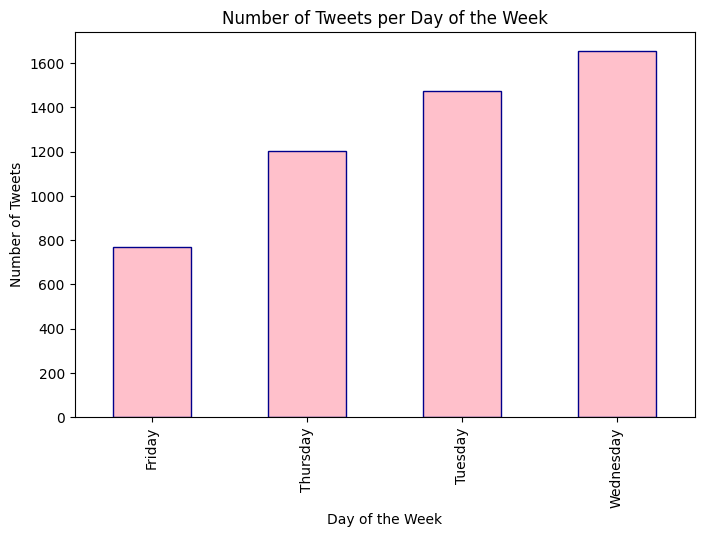

In [37]:
tweets_per_day = df["publishing_days"].value_counts()
plt.figure(figsize=(8, 5))
tweets_per_day.sort_index().plot(kind="bar", color="pink", edgecolor="darkblue")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Tweets")
plt.title("Number of Tweets per Day of the Week")

In [45]:
df.to_csv("Olga_Gasowska_dane1.csv", index=False)